### 1. Import and data loading

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time

In [2]:
df = pd.read_csv("../data/chess_games_feature.csv")
df.head()

,WhiteElo,BlackElo,total_moves,w_captures,w_checks,w_castles,w_promotions,b_captures,b_checks,b_castles,...,check_diff,total_promotions,promotion_diff,aggression_diff,both_castled,game_length_short,game_length_medium,game_length_long,tactical_intensity,white_more_aggressive
0,2504,2371,49,4,0,1,0,4,0,1,...,0,0,0,-0.006667,1,0,1,0,0.163265,0
1,2487,2596,71,8,10,1,0,7,2,1,...,8,0,0,0.242857,1,0,0,1,0.380282,1
2,2915,2921,59,4,0,1,0,4,0,1,...,0,0,0,-0.004598,1,0,1,0,0.135593,0
3,2542,2433,71,10,1,1,0,9,3,0,...,-2,0,0,-0.037302,0,0,0,1,0.323944,0
4,2473,2658,56,5,3,1,0,6,0,1,...,3,0,0,0.071429,1,0,1,0,0.250000,1


### 2. Prepare data

In [3]:
X = df.drop('ResultNumeric', axis=1)
y = df['ResultNumeric']

print(f"Features: {X.shape}")
print(f"Target: {y.shape}")

Features: (3267529, 36)
Target: (3267529,)


### 3. Train test split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,        # 20% for testing
    random_state=42,
    stratify=y
)

### 4. Train model

In [5]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=20,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42,
    n_jobs=-1,                # Use all CPU cores
)

In [6]:
start_time = time.time()

rf_model.fit(X_train, y_train)

training_time = time.time() - start_time
print(f"Training completed in {training_time:.2f} seconds ({training_time/60:.2f} minutes)")

Training completed in 286.94 seconds (4.78 minutes)


### 5. Evaluate

In [7]:
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)\n")

print("Classification Report: \n")
print(classification_report(y_test, y_pred, target_names=['Black Win', 'Draw', 'White Win']))

Accuracy: 0.8195 (81.95%)

Classification Report: 

              precision    recall  f1-score   support

   Black Win       0.81      0.85      0.83    267653
        Draw       0.82      0.55      0.66     84330
   White Win       0.83      0.87      0.85    301523

    accuracy                           0.82    653506
   macro avg       0.82      0.76      0.78    653506
weighted avg       0.82      0.82      0.82    653506



### 6. Confusion Matrix

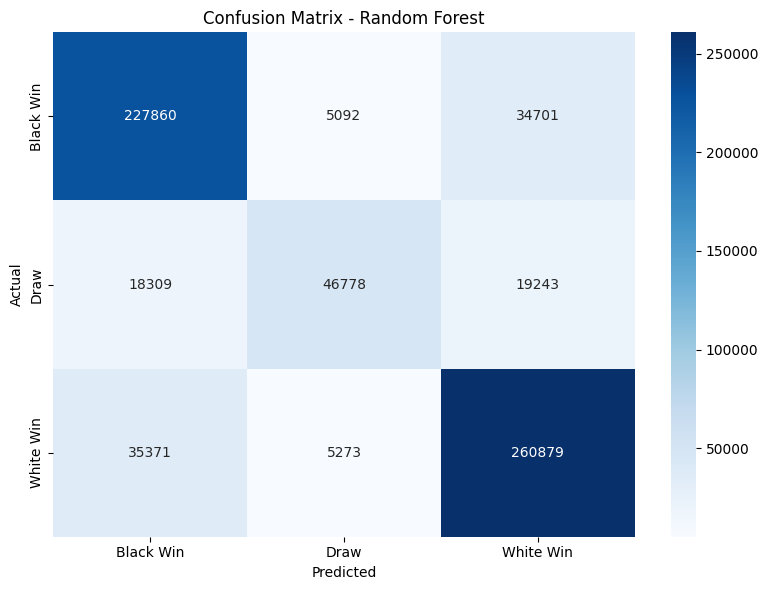

In [8]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Black Win', 'Draw', 'White Win'],
            yticklabels=['Black Win', 'Draw', 'White Win'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Random Forest')
plt.tight_layout()
plt.show()

### 7. Feature Importance

                  Feature  Importance
29        aggression_diff    0.181754
23           capture_diff    0.169501
35  white_more_aggressive    0.067971
1                BlackElo    0.041451
26             check_diff    0.041334
17              AvgRating    0.040418
19   WhiteRatingAdvantage    0.036419
2             total_moves    0.034896
21          TerminationID    0.033225
24       capture_diff_abs    0.032294
22         total_captures    0.032201
0                WhiteElo    0.032153
7              b_captures    0.030773
3              w_captures    0.028360
14     b_aggression_score    0.022296
18     WhiteIsHigherRated    0.018709
28         promotion_diff    0.017595
11         w_capture_rate    0.017032
12         b_capture_rate    0.015180
13     w_aggression_score    0.014850
16             RatingDiff    0.013548
34     tactical_intensity    0.012183
8                b_checks    0.011929
25           total_checks    0.011099
4                w_checks    0.010258
6           

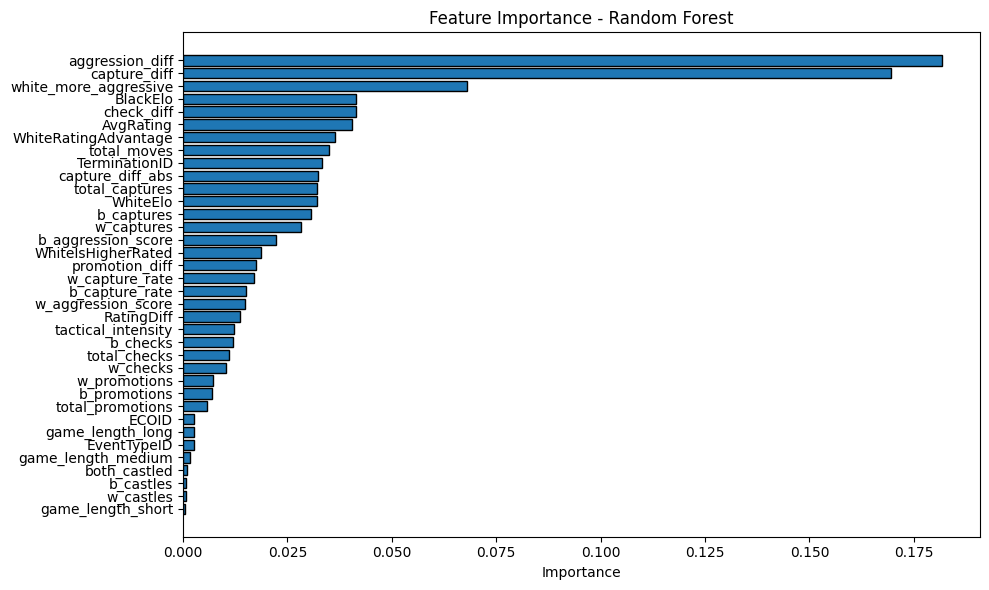

In [9]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print(feature_importance)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], edgecolor="black")
plt.xlabel('Importance')
plt.title('Feature Importance - Random Forest')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()